# Predicting Insurance Charges using Linear Regression.

# Author- Rohan Kulkarni

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/_RoXstaR_/OneDrive/Desktop/insuranceLiner.csv')

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
LE=LabelEncoder()

In [7]:
df[df.select_dtypes(include=['object']).columns]=df[df.select_dtypes(include=['object']).columns].apply(LE.fit_transform)

In [8]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


## MODEL BUILDING

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X=df.drop(columns=['charges'])
y=df['charges']

In [143]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.2)

In [144]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [145]:
LR.fit(X_train,y_train)

LinearRegression()

In [146]:
R2=LR.score(X_train,y_train)
R2

0.8924099251146191

In [147]:
N= X_train.shape[0]
K= X_train.shape[1]

adj_R= 1 - (1- R2) * ( N-1 ) / ( N-K-1 )
adj_R

0.8915823091539624

In [148]:
LR.intercept_

-2963.5470869989194

In [149]:
LR.coef_

array([ 2.56788879e+02, -4.82929691e+02,  4.66998113e+00,  4.04386255e+02,
        1.15173516e+04, -2.10618601e+02])

In [150]:
column_coef=pd.DataFrame({'Columns':X_train.columns , 'coeficients':LR.coef_})
column_coef

,Columns,coeficients
0,age,256.788879
1,sex,-482.929691
2,bmi,4.669981
3,children,404.386255
4,smoker,11517.351634
5,region,-210.618601


## Prediction on train and test

In [151]:
pred_y_train=LR.predict(X_train)
pred_y_test=LR.predict(X_test)

In [152]:
# Check the assumptions on train data

error_train= y_train - pred_y_train
error_test= y_test - pred_y_test

In [153]:
error_train.mean()

-1.0522171867398363e-12

In [154]:
error_test.mean()

45.732633568681436

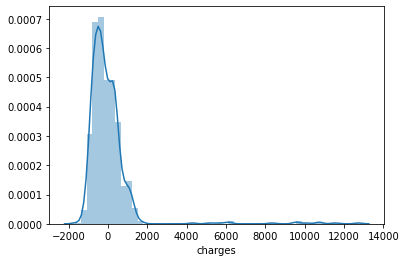

In [155]:
sns.distplot(error_train)

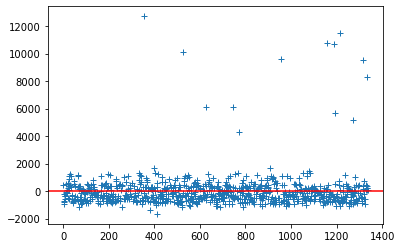

In [156]:
plt.plot(error_train,'+')
plt.axhline(y = error_train.mean(), color='r')
#plt.axhline(y =  100000, color='r')
#plt.axhline(y = -100000, color='r')
#plt.title('Scatter plot on error Terms',size=15)

In [157]:
pred_actual=pd.DataFrame({ 'Pred': pred_y_train, 'Actual': y_train})

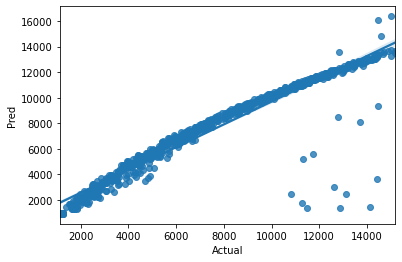

In [158]:
sns.regplot(pred_actual.Actual , pred_actual.Pred)

(array([397., 363.,  14.,   0.,   2.,   3.,   1.,   2.,   3.,   2.]),
 array([-1663.74419787,  -225.68424489,  1212.37570809,  2650.43566107,
         4088.49561405,  5526.55556703,  6964.61552001,  8402.67547299,
         9840.73542597, 11278.79537895, 12716.85533194]),
 <a list of 10 Patch objects>)

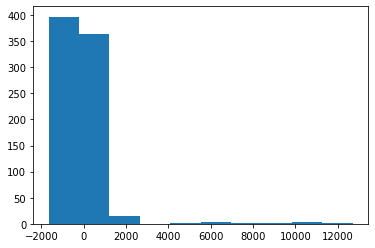

In [159]:
plt.hist(error_train)

In [138]:
def remove_outliers(df, col, k=2):
    mean= df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x > mean-k*sd)]
    final_list=[x for x in final_list if (x < mean + k*sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("Number of outliers removed-->", df.shape[0]-df1.shape[0])

In [139]:
remove_outliers(df,'charges',k=2)

(984, 7)
Number of outliers removed--> 12


In [140]:
df=df1

## Metrics

In [160]:
MSE=np.mean(np.square(error_test))
MSE

1641886.0900834957

In [162]:
RMSE=np.sqrt(MSE)
RMSE

1281.3610303437106

In [163]:
MAPE=np.round(np.mean(np.abs(error_test*100/y_test)))
MAPE

10.0